# Figure 2b
Seeing overlap trens of top hit brain regions

In [1]:
%run overlap_functions.ipynb
import seaborn as sns

In [2]:
# Loading the comprehensive overlap dataframe of brain regions and Jacobian
df_path = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/RAG2_neg_comp_overlap_anat.csv'
overlap_df = pd.read_csv(df_path, index_col = 'Unnamed: 0')

# Sorting the dataframe by DICE coeff and resetting the index
sorted_df = overlap_df.sort_values(by=['DICE_neg_jcb_anat'], ascending=False, na_position='last')
sorted_df.reset_index(drop=True, inplace=True)

# Choosing top hits until the overlap with jacobian reaches a threshold
threshold = 0.51
thresh_df = sorted_df[sorted_df['jac_overlap_ratio'].cumsum() < threshold]

print('Last index included to reach an overlap of {} with Jacobian is {}.'\
.format(threshold, thresh_df.shape[0]))

Last index included to reach an overlap of 0.51 with Jacobian is 15.


Maximum ratio is 0.7945441988950276 for 32 clusters.

Maximum ratio is 0.5105454545454545 for 104 clusters.

Maximum ratio is 0.4591947769314472 for 29 clusters.



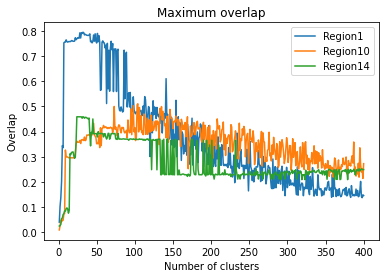

In [5]:
'''
Making a dataframe that has the overlap ratios of one brain region and clusters.
mode = DICE
'''

# Range of number of clusters
n_max = 400
number_range = range(1, n_max+1)

# List of brain region numbers from dataframe to include
regions_list = [1,10,14]

# Loading the anatomy file
ant_file = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/allen_annot200.nii'
ant_vec = nifti_to_array(ant_file)

for i in regions_list:
    # Selecting a brain region
    region_number = i
    region_ID = [thresh_df['ant_id'][region_number]]

    # Creating an array to store overlap ratios
    score_arr = np.zeros((n_max, n_max))

    # Looping over different clusters
    for n_clusters in number_range:
        # Inputting path to the cluster file
        cluster_file = '/data/bioprotean/ABA/PCA/Kmeans_labels/NII/nclusters_fixed'+str(n_clusters)+'.nii'
        cluster_vec = nifti_to_array(cluster_file)
        cluster_ids = list(range(n_clusters))

        # Computing the overlap for the cluster
        overlap_list = overlap_function(base_arr = ant_vec, input_arr = cluster_vec,\
        base_ids_list = region_ID, input_ids_list = cluster_ids)

        # Adding the overlap list to the array
        score_arr[:n_clusters, n_clusters-1] = np.array(overlap_list)

    # Converting the array to a dataframe
    output_0_df = pd.DataFrame(score_arr, columns = [str(i)+'_clusters' for i in number_range])
    output_0_df['cluster_ID'] = range(n_max)
    output_0_df.set_index('cluster_ID', inplace = True)
    
    
    '''
    Plotting the highest value in each experiment.
    '''
    # List of max overlap from each column
    max_ratio_list = []

    for i in range(n_max):
        max_ratio = output_0_df.iloc[:,i].max()
        max_ratio_list.append(max_ratio)

    # Defining x and y
    x = range(1, n_clusters+1)
    y = max_ratio_list

    print('Maximum ratio is {} for {} clusters.\n'.format(max(y), y.index(max(y))+1))

    # Plotting the ratios
    plt.plot(x, y)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of clusters")
plt.ylabel("Overlap")
plt.title("Maximum overlap")
plt.legend(['Region'+str(i) for i in regions_list])
# Setting the figure size
plt.rcParams["figure.figsize"] = (10,10)

# To load the display window
plt.show()

Maximum ratio is 0.41909814323607425 for 353 clusters.

Maximum ratio is 0.4672489082969432 for 393 clusters.

Maximum ratio is 0.16119402985074627 for 366 clusters.

Maximum ratio is 0.3534675615212528 for 337 clusters.

Maximum ratio is 0.37358490566037733 for 315 clusters.

Maximum ratio is 0.20085470085470086 for 373 clusters.



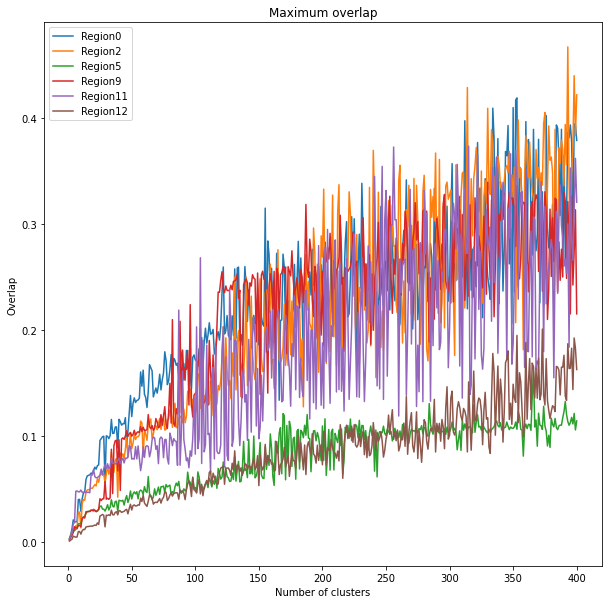

In [7]:
'''
Making a dataframe that has the overlap ratios of one brain region and clusters.
mode = DICE
'''

# Range of number of clusters
n_max = 400
number_range = range(1, n_max+1)

# List of brain region numbers from dataframe to include
regions_list = [0,2,5,9,11,12]

# Loading the anatomy file
ant_file = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/allen_annot200.nii'
ant_vec = nifti_to_array(ant_file)

for i in regions_list:
    # Selecting a brain region
    region_number = i
    region_ID = [thresh_df['ant_id'][region_number]]

    # Creating an array to store overlap ratios
    score_arr = np.zeros((n_max, n_max))

    # Looping over different clusters
    for n_clusters in number_range:
        # Inputting path to the cluster file
        cluster_file = '/data/bioprotean/ABA/PCA/Kmeans_labels/NII/nclusters_fixed'+str(n_clusters)+'.nii'
        cluster_vec = nifti_to_array(cluster_file)
        cluster_ids = list(range(n_clusters))

        # Computing the overlap for the cluster
        overlap_list = overlap_function(base_arr = ant_vec, input_arr = cluster_vec,\
        base_ids_list = region_ID, input_ids_list = cluster_ids)

        # Adding the overlap list to the array
        score_arr[:n_clusters, n_clusters-1] = np.array(overlap_list)

    # Converting the array to a dataframe
    output_0_df = pd.DataFrame(score_arr, columns = [str(i)+'_clusters' for i in number_range])
    output_0_df['cluster_ID'] = range(n_max)
    output_0_df.set_index('cluster_ID', inplace = True)
    
    
    '''
    Plotting the highest value in each experiment.
    '''
    # List of max overlap from each column
    max_ratio_list = []

    for i in range(n_max):
        max_ratio = output_0_df.iloc[:,i].max()
        max_ratio_list.append(max_ratio)

    # Defining x and y
    x = range(1, n_clusters+1)
    y = max_ratio_list

    print('Maximum ratio is {} for {} clusters.\n'.format(max(y), y.index(max(y))+1))

    # Plotting the ratios
    plt.plot(x, y)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of clusters")
plt.ylabel("Overlap")
plt.title("Maximum overlap")
plt.legend(['Region'+str(i) for i in regions_list])
# Setting the figure size
plt.rcParams["figure.figsize"] = (10,10)

# To load the display window
plt.show()

Maximum ratio is 0.6517857142857143 for 289 clusters.

Maximum ratio is 0.4454828660436137 for 285 clusters.

Maximum ratio is 0.3300678221552374 for 125 clusters.

Maximum ratio is 0.3215434083601286 for 381 clusters.

Maximum ratio is 0.40711462450592883 for 389 clusters.

Maximum ratio is 0.3425814234016888 for 255 clusters.



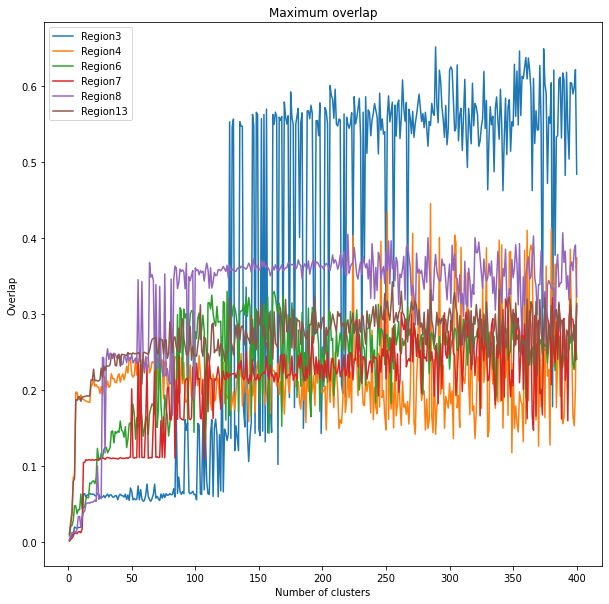

In [8]:
'''
Making a dataframe that has the overlap ratios of one brain region and clusters.
mode = DICE
'''

# Range of number of clusters
n_max = 400
number_range = range(1, n_max+1)

# List of brain region numbers from dataframe to include
regions_list = [3,4,6,7,8,13]

# Loading the anatomy file
ant_file = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/allen_annot200.nii'
ant_vec = nifti_to_array(ant_file)

for i in regions_list:
    # Selecting a brain region
    region_number = i
    region_ID = [thresh_df['ant_id'][region_number]]

    # Creating an array to store overlap ratios
    score_arr = np.zeros((n_max, n_max))

    # Looping over different clusters
    for n_clusters in number_range:
        # Inputting path to the cluster file
        cluster_file = '/data/bioprotean/ABA/PCA/Kmeans_labels/NII/nclusters_fixed'+str(n_clusters)+'.nii'
        cluster_vec = nifti_to_array(cluster_file)
        cluster_ids = list(range(n_clusters))

        # Computing the overlap for the cluster
        overlap_list = overlap_function(base_arr = ant_vec, input_arr = cluster_vec,\
        base_ids_list = region_ID, input_ids_list = cluster_ids)

        # Adding the overlap list to the array
        score_arr[:n_clusters, n_clusters-1] = np.array(overlap_list)

    # Converting the array to a dataframe
    output_0_df = pd.DataFrame(score_arr, columns = [str(i)+'_clusters' for i in number_range])
    output_0_df['cluster_ID'] = range(n_max)
    output_0_df.set_index('cluster_ID', inplace = True)
    
    
    '''
    Plotting the highest value in each experiment.
    '''
    # List of max overlap from each column
    max_ratio_list = []

    for i in range(n_max):
        max_ratio = output_0_df.iloc[:,i].max()
        max_ratio_list.append(max_ratio)

    # Defining x and y
    x = range(1, n_clusters+1)
    y = max_ratio_list

    print('Maximum ratio is {} for {} clusters.\n'.format(max(y), y.index(max(y))+1))

    # Plotting the ratios
    plt.plot(x, y)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of clusters")
plt.ylabel("Overlap")
plt.title("Maximum overlap")
plt.legend(['Region'+str(i) for i in regions_list])
# Setting the figure size
plt.rcParams["figure.figsize"] = (10,10)

# To load the display window
plt.show()